In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [4]:
df = pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')

In [5]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df.duplicated().sum()

0

In [8]:
df.drop(columns = ['RowNumber','CustomerId','Surname'],inplace=True)

In [9]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [15]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [16]:
X = df.drop(columns=['Exited'])
y = df['Exited'].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense

In [27]:
model = Sequential()

model.add(Dense(3,activation='sigmoid',input_dim=11))
model.add(Dense(1,activation='sigmoid'))


In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 3)                 36        
                                                                 
 dense_3 (Dense)             (None, 1)                 4         
                                                                 
Total params: 40
Trainable params: 40
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.compile(optimizer='Adam',loss='binary_crossentropy')

In [41]:
model.fit(X_train_scaled,y_train,epochs=10)

Epoch 1/10
250/250 [==============================] - 1s 2ms/step - loss: 0.4889 - accuracy: 0.7915
Epoch 2/10
250/250 [==============================] - 1s 2ms/step - loss: 0.4394 - accuracy: 0.8085
Epoch 3/10
250/250 [==============================] - 1s 2ms/step - loss: 0.4223 - accuracy: 0.8198
Epoch 4/10
250/250 [==============================] - 1s 2ms/step - loss: 0.4115 - accuracy: 0.8244
Epoch 5/10
250/250 [==============================] - 0s 2ms/step - loss: 0.4038 - accuracy: 0.8286
Epoch 6/10
250/250 [==============================] - 0s 2ms/step - loss: 0.3965 - accuracy: 0.8305
Epoch 7/10
250/250 [==============================] - 0s 2ms/step - loss: 0.3886 - accuracy: 0.8351
Epoch 8/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3790 - accuracy: 0.8418
Epoch 9/10
250/250 [==============================] - 0s 2ms/step - loss: 0.3687 - accuracy: 0.8471
Epoch 10/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3604 - accuracy: 0.8499

In [31]:
model.layers[0].get_weights() # 33 rows and last 3 bias means 36 trainable parameter

[array([[ 0.08750416, -0.02040842,  0.11707217],
        [-2.4141297 ,  0.9859733 , -0.66502446],
        [-0.19875506, -0.05109281,  0.3760802 ],
        [-0.28718778, -0.03375165, -0.25924277],
        [ 0.06899456, -0.18668953,  0.26022676],
        [-0.19639668, -0.00290418,  0.19476533],
        [ 0.1225258 , -0.73003244,  0.9455546 ],
        [ 0.04540863, -0.21364294, -0.2214221 ],
        [-0.20077324,  0.4489866 , -0.8940032 ],
        [-0.0397448 ,  0.21942817, -0.01386132],
        [ 0.22721098, -0.86836255,  0.4039946 ]], dtype=float32),
 array([ 0.3491574 , -0.24946535,  0.4087507 ], dtype=float32)]

In [34]:
y_log = model.predict(X_test_scaled) # we want 1 and 0  as output, so above 0.5 will be as 1 and below 0.5 will 0
y_log

63/63 [==============================] - 0s 2ms/step


array([[0.24804465],
       [0.35070837],
       [0.18455723],
       ...,
       [0.16688342],
       [0.13348062],
       [0.20563418]], dtype=float32)

In [36]:
y_pred = np.where(y_log > 0.5,1,0)
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [37]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8175

will try to improve accuracy more than 0.81

In [38]:
model = Sequential()

model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [39]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 11)                132       
                                                                 
 dense_5 (Dense)             (None, 11)                132       
                                                                 
 dense_6 (Dense)             (None, 1)                 12        
                                                                 
Total params: 276
Trainable params: 276
Non-trainable params: 0
_________________________________________________________________


In [42]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [50]:
history = model.fit(X_train_scaled,y_train,epochs=100, validation_split = 0.2)

Epoch 1/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3204 - accuracy: 0.8620 - val_loss: 0.3641 - val_accuracy: 0.8438
Epoch 2/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3203 - accuracy: 0.8627 - val_loss: 0.3635 - val_accuracy: 0.8481
Epoch 3/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3200 - accuracy: 0.8642 - val_loss: 0.3636 - val_accuracy: 0.8500
Epoch 4/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3199 - accuracy: 0.8650 - val_loss: 0.3618 - val_accuracy: 0.8487
Epoch 5/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3196 - accuracy: 0.8650 - val_loss: 0.3621 - val_accuracy: 0.8481
Epoch 6/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3195 - accuracy: 0.8625 - val_loss: 0.3626 - val_accuracy: 0.8519
Epoch 7/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3196 - accuracy: 0.8648 - val_loss: 0.3635 - val_accuracy: 0.8562

In [51]:
model.layers[1].get_weights() # for layer 1

[array([[-2.09487468e-01,  2.04966247e-01,  3.97571474e-01,
          8.30452085e-01, -9.28611577e-01,  7.10455358e-01,
          3.64652872e-01,  5.03325105e-01,  5.00499070e-01,
         -6.67332888e-01,  2.18870595e-01],
        [-2.73981065e-01,  2.61594862e-01,  3.33944559e-01,
         -1.00436196e-01, -1.15565288e+00, -1.28430052e-04,
          3.35146666e-01, -1.62010863e-01,  3.81591588e-01,
          2.54611343e-01, -8.33520368e-02],
        [-8.70872214e-02, -5.96057355e-01, -1.83141142e-01,
          4.23153460e-01,  4.50526953e-01, -5.56406021e-01,
         -5.54519355e-01, -7.80019462e-01,  1.33382484e-01,
         -2.61936545e-01,  1.28734723e-01],
        [-5.11096895e-01, -2.24934354e-01,  4.10577118e-01,
          6.65169775e-01, -6.76886201e-01,  4.77390915e-01,
         -4.67149466e-01,  4.66490597e-01, -9.12905484e-03,
          1.57201543e-01,  4.01146144e-01],
        [-1.23256318e-01, -4.81463164e-01, -2.26812735e-01,
         -1.21095270e-01, -1.05777049e+00, -

In [52]:
model.layers[2].get_weights() # for layer 2

[array([[ 1.2166716 ],
        [ 1.4455277 ],
        [-0.53748333],
        [ 0.9393117 ],
        [ 1.0392374 ],
        [-0.57768697],
        [-1.021987  ],
        [-0.33547387],
        [-0.74988234],
        [-0.31203607],
        [-0.48281115]], dtype=float32),
 array([-0.3169152], dtype=float32)]

In [53]:
y_log = model.predict(X_test_scaled) # we want 1 and 0  as output, so above 0.5 will be as 1 and below 0.5 will 0
y_log

63/63 [==============================] - 0s 2ms/step


array([[0.22597419],
       [0.3140775 ],
       [0.13705496],
       ...,
       [0.15194951],
       [0.16866447],
       [0.18249054]], dtype=float32)

In [54]:
y_pred = np.where(y_log > 0.5,1,0)
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [55]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.861

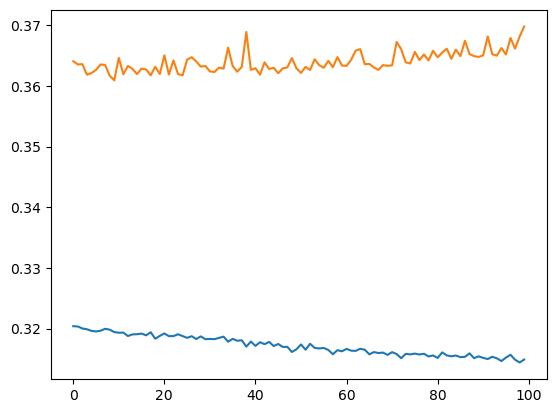

In [56]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

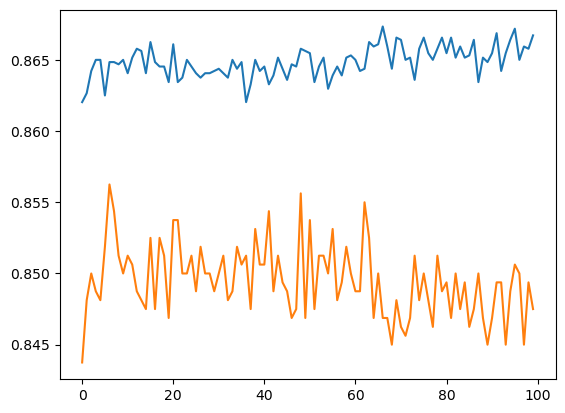

In [57]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])